### importing important libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, classification_report, roc_auc_score, confusion_matrix

### loading data

In [16]:
address = "C:/Users/hp/Desktop/Kifya/Week_8&9/Data/clean/"
df = pd.read_csv(address + "processed_data.csv")
df.head()

,user_id,signup_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,frequency,hour_of_day,Day_of_Week,perchase_time,recent_purchase_time,time_since_signup
0,22058,2015-02-24 22:55:49,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,2,Saturday,2015-04-18 02:47:11,2015-04-18 02:47:11,52.0
1,333320,2015-06-07 20:39:50,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,Monday,2015-06-08 01:38:54,2015-06-08 01:38:54,0.0
2,1359,2015-01-01 18:52:44,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,18,Thursday,2015-01-01 18:52:45,2015-01-01 18:52:45,0.0
3,150084,2015-04-28 21:13:25,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,13,Monday,2015-05-04 13:54:50,2015-05-04 13:54:50,5.0
4,221365,2015-07-21 07:09:52,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,18,Wednesday,2015-09-09 18:40:53,2015-09-09 18:40:53,50.0


OneHot encoding of catagorical data

In [17]:
def one_hot_encode(df, columns):
    encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    encoded_array = encoder.fit_transform(df[columns])
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(columns))
    df = pd.concat([df.drop(columns=columns).reset_index(drop=True), encoded_df], axis=1)
    return df

In [18]:
df = one_hot_encode(df, ['source', 'browser', 'country'])
df.head()

,user_id,signup_time,purchase_value,device_id,sex,age,ip_address,class,frequency,hour_of_day,Day_of_Week,perchase_time,recent_purchase_time,time_since_signup,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,...,country_Saint Martin,country_San Marino,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Singapore,country_Slovakia (SLOVAK Republic),country_Slovenia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Taiwan; Republic of China (ROC),country_Tajikistan,country_Tanzania United Republic of,country_Thailand,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,country_nan
0,22058,2015-02-24 22:55:49,34,QVPSPJUOCKZAR,M,39,7.327584e+08,0,1,2,Saturday,2015-04-18 02:47:11,2015-04-18 02:47:11,52.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,333320,2015-06-07 20:39:50,16,EOGFQPIZPYXFZ,F,53,3.503114e+08,0,1,1,Monday,2015-06-08 01:38:54,2015-06-08 01:38:54,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1359,2015-01-01 18:52:44,15,YSSKYOSJHPPLJ,M,53,2.621474e+09,1,1,18,Thursday,2015-01-01 18:52:45,2015-01-01 18:52:45,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,150084,2015-04-28 21:13:25,44,ATGTXKYKUDUQN,M,41,3.840542e+09,0,1,13,Monday,2015-05-04 13:54:50,2015-05-04 13:54:50,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,221365,2015-07-21 07:09:52,39,NAUITBZFJKHWW,M,45,4.155831e+08,0,1,18,Wednesday,2015-09-09 18:40:53,2015-09-09 18:40:53,50.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


split the data

In [19]:
x = df.select_dtypes(include=['int', 'float']).drop(columns=['class'], errors='ignore')
y = df['class']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

train the models

Linear Regression
RMSE:  0.42507361942891175
R2_score:  -3.9770503909281842
f1_score:  0.4351120009027503
accuracy score:  0.5749263805710882
AUC: 0.5012847850455789
classification_report:                precision    recall  f1-score   support

           0       0.91      0.59      0.72     27373
           1       0.09      0.41      0.15      2850

    accuracy                           0.57     30223
   macro avg       0.50      0.50      0.44     30223
weighted avg       0.83      0.57      0.66     30223

Confusion Matrix:
[[16206 11167]
 [ 1680  1170]]


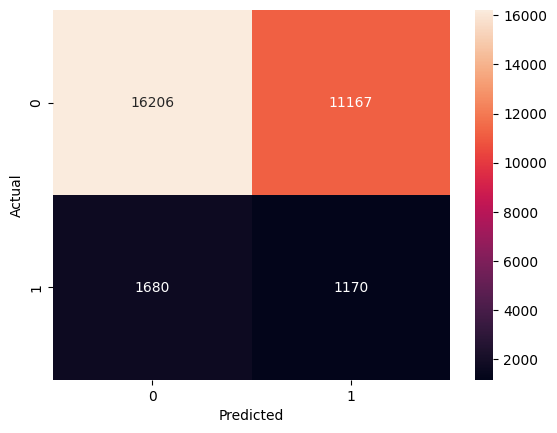

Random Forest
RMSE:  0.048373755087185256
R2_score:  0.4336072490435895
f1_score:  0.8266127834796524
accuracy score:  0.9516262449128148
AUC: 0.7688135318385834
classification_report:                precision    recall  f1-score   support

           0       0.95      0.99      0.97     27373
           1       0.91      0.54      0.68      2850

    accuracy                           0.95     30223
   macro avg       0.93      0.77      0.83     30223
weighted avg       0.95      0.95      0.95     30223

Confusion Matrix:
[[27212   161]
 [ 1301  1549]]


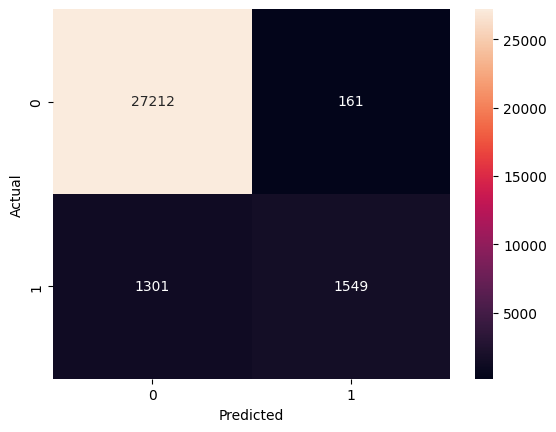

In [21]:
models = {
    "Linear Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}

results = {}

for name, model in models.items():
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(Y_test, preds)
    r2 = r2_score(Y_test, preds)
    f1 = f1_score(Y_test, preds, average='macro')
    accuracy = accuracy_score(Y_test, preds)
    auc = roc_auc_score(Y_test, preds)
    print(name)
    print(f"RMSE:  {rmse}")
    print(f"R2_score:  {r2}")
    print(f"f1_score:  {f1}")
    print(f"accuracy score:  {accuracy}")
    print(f"AUC: {auc}")

    print(f"classification_report:  {classification_report(Y_test,preds)}")
    cm = confusion_matrix(Y_test, preds)
    print("Confusion Matrix:")
    print(cm)

    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    

In [22]:
df.to_csv(address + "final_fraud.csv", index=False)